# 🎬 Movie Recommender System

Welcome to the Movie Recommender System project! This notebook demonstrates how to build a movie recommender using **Item-Based Collaborative Filtering** on the MovieLens 100k dataset.

🎯 **Goal**: Build a recommendation engine that suggests movies based on user preferences and similar user behaviors.

📊 **Dataset**: [MovieLens 100k](https://grouplens.org/datasets/movielens/100k/) - Contains 100,000 ratings from 943 users on 1,682 movies. 

## 🛠️ Import Libraries

Let's start by importing the essential Python libraries for data analysis and visualization.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 📥 Import Dataset

We will import two datasets:
- **Movie_Id_Titles**: Contains movie IDs and their corresponding titles
- **u.data**: Contains user ratings with user_id, item_id, rating, and timestamp

These datasets will be merged to create a comprehensive movie-rating dataset for analysis.

In [2]:
movie_titles_df = pd.read_csv("Movie_Id_Titles")
movie_titles_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [3]:
# sep --> seperator to signify what seperates the columns and names --> names of the columns that are to be fetched
movies_ratings_df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies_ratings_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


### 🧹 Data Cleaning

Removing unnecessary columns that won't be used in our recommendation model.


In [4]:
# Dropping the timestamp column as not relevant for the model training:
movies_ratings_df.drop('timestamp', axis=1, inplace=True)
movies_ratings_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


### 📊 Data Exploration

Let's examine the structure and statistics of our cleaned dataset.


In [5]:
movies_ratings_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [6]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


### 🔢 Merging Datasets

Combining movie titles with ratings data using the common movie ID field.


In [7]:
# Merging both Datasets/dataframes:
movies_ratings_df = pd.merge(movies_ratings_df, movie_titles_df, on = "item_id")    # on = "item_id" --> the common column name which acts as a key to merge the datasets or a converter
movies_ratings_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,0,172,5,"Empire Strikes Back, The (1980)"
2,0,133,1,Gone with the Wind (1939)
3,196,242,3,Kolya (1996)
4,186,302,3,L.A. Confidential (1997)
...,...,...,...,...
99998,880,476,3,"First Wives Club, The (1996)"
99999,716,204,5,Back to the Future (1985)
100000,276,1090,1,Sliver (1993)
100001,13,225,2,101 Dalmatians (1996)


In [8]:
movies_ratings_df.shape

(100003, 4)

## 📈 Visualize Dataset

Let's explore the merged dataset by analyzing movie ratings patterns, distribution, and statistics to better understand our data.

In [9]:
# Grouping the movies by title:
movies_ratings_df.groupby('title').describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ...                 rating  \
                                         mean  ...     75%     max  count   
title                                          ...                          
'Til There Was You (1997)              1300.0  ...  1300.0  1300.0    9.0   
1-900 (1994)                           1353.0  ...  1353.0  1353.0    5.0   
101 Dalmatians (1996)                   225.0  ...   225.0   225.0  109.0   
12 Angry Men (1957)                     178.0  ...   178.0   178.0  125.0   
187 (1997)                              330.0  ...   330.0   330.0   41.0   
...                                       ...  ...     ...     ...    ...   
Young Guns II (1990)                   1188.0  ...  1188.0  1188.0   44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...   547.0   547.0   41.0   
Zeus and Roxanne (1997)                1164.0  ...  1164.0  1164.0    6.0   
unknown                                 267.0  ...   267.0   267.0    9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...  1633.0  1633.0    1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.

In [10]:
# Now to group by title and only need to see the description (count, mean, standard deviation, etc)of ratings:
movies_ratings_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


### 📈 Rating Statistics & Visualization

Creating statistical summaries and visualizations to understand rating patterns across movies.


In [11]:
# Creating two dataframes: mean and count:
# Count -->  Number of people who watched and reviewed the movie
ratings_df_mean = movies_ratings_df.groupby('title')['rating'].describe()['mean']
ratings_df_mean

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [12]:
ratings_df_count = movies_ratings_df.groupby('title')['rating'].describe()['count']
ratings_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [13]:
# Concatinate the two dataframes: count, mean.
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)
ratings_mean_count_df

,count,mean
title,,
'Til There Was You (1997),9.0,2.333333
1-900 (1994),5.0,2.600000
101 Dalmatians (1996),109.0,2.908257
12 Angry Men (1957),125.0,4.344000
187 (1997),41.0,3.024390
...,...,...
Young Guns II (1990),44.0,2.772727
"Young Poisoner's Handbook, The (1995)",41.0,3.341463
Zeus and Roxanne (1997),6.0,2.166667


In [14]:
# We also want title to be a real column:
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


<Axes: ylabel='Frequency'>

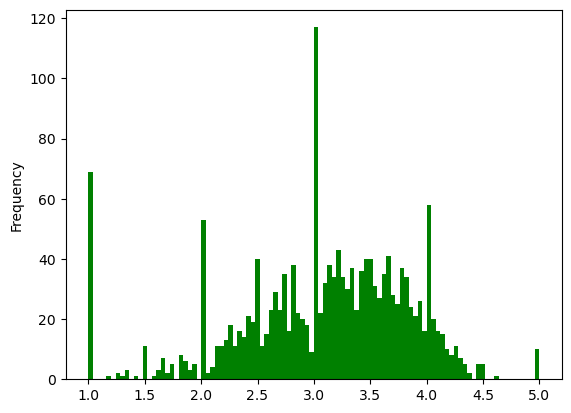

In [15]:
# Plotting histogram of mean of ratings distribution:
ratings_mean_count_df['mean'].plot(bins = 100, kind = 'hist', color = 'g')

<Axes: ylabel='Frequency'>

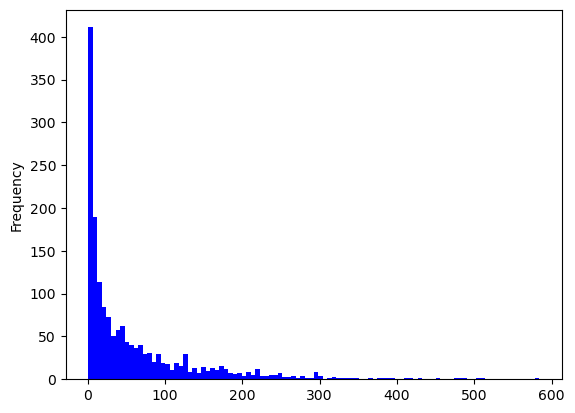

In [16]:
# Plotting histogram of count of ratings distribution:
ratings_mean_count_df['count'].plot(bins = 100, kind = 'hist', color = 'b')

In [17]:
# Movies with 5 star ratings:
# These are the movies that have been rated 5 stars but not by many number of people:
ratings_mean_count_df[ratings_mean_count_df['mean'] == 5]

,count,mean
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


In [18]:
# 100 Highest rated movies:
# Movies reviewed by many people and high ratings:
ratings_mean_count_df.sort_values('count', ascending = False). head(100)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
...,...,...
Aladdin (1992),219.0,3.812785
Babe (1995),219.0,3.995434
Volcano (1997),219.0,2.808219


In [19]:
# 100 least rated movies:
# Movies reviewed by few people and low ratings:
ratings_mean_count_df.sort_values('count', ascending = True). head(100)

,count,mean
title,,
Á köldum klaka (Cold Fever) (1994),1.0,3.0
Mille bolle blu (1993),1.0,1.0
Mat' i syn (1997),1.0,1.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
"Man from Down Under, The (1943)",1.0,1.0
...,...,...
The Courtyard (1995),1.0,1.0
"Vie est belle, La (Life is Rosey) (1987)",1.0,1.0
"Silence of the Palace, The (Saimt el Qusur) (1994)",1.0,3.0


## 🤝 Collaborative Filtering for a Single Movie

Now we'll build a collaborative filter to find movies similar to a specific movie. This approach analyzes user rating patterns to identify movies that users with similar tastes have enjoyed.

### 🧩 Creating User-Movie Matrix

Building a pivot table that shows which users rated which movies - the foundation of collaborative filtering.


In [20]:
# Creating a 2D Matrix by using pivot table, this shows the ratings given by each user to each movie:
# rows --> user_id, columns --> title, values --> rating
userid_movietitle_matrix = movies_ratings_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# To see the ratings given by each users for Titanic:
titanic = userid_movietitle_matrix['Titanic (1997)']
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [22]:
# To see the ratings given by each users for Star Wars:
starwars = userid_movietitle_matrix['Star Wars (1977)']
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

🔍 **Single Movie Collaborative Filter Example**

Let's create a collaborative filter for **Star Wars (1977)** as our example. We'll find movies that are most similar based on user rating correlations.

✨ **Star Wars Correlation Analysis**

Now we'll calculate correlations between Star Wars and all other movies to find the most similar films based on user preferences.

In [23]:
# Creating a Collaborative filter for Star Wars: 
starwars_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(starwars), columns = ['Correlation'])

c:\Users\sandh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\sandh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\sandh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\sandh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\sandh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [24]:
# Creating correlation matrix for starwars:
starwars_correlations = starwars_correlations.join(ratings_mean_count_df['count'])
starwars_correlations

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
...,...,...
Young Guns II (1990),0.228615,44.0
"Young Poisoner's Handbook, The (1995)",-0.007374,41.0
Zeus and Roxanne (1997),0.818182,6.0


In [25]:
# Dropping the rows with NaN , only movies with correlation with starwars:
starwars_correlations.dropna(inplace = True)
starwars_correlations

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
...,...,...
Young Guns (1988),0.186377,101.0
Young Guns II (1990),0.228615,44.0
"Young Poisoner's Handbook, The (1995)",-0.007374,41.0


In [26]:
# Sorting the correlation values in descending order:
starwars_correlations.sort_values('Correlation', ascending = False).head(10)

,Correlation,count
title,,
Hollow Reed (1996),1.0,6.0
Commandments (1997),1.0,3.0
Cosi (1996),1.0,4.0
No Escape (1994),1.0,5.0
Stripes (1981),1.0,5.0
Star Wars (1977),1.0,584.0
Man of the Year (1995),1.0,9.0
"Beans of Egypt, Maine, The (1994)",1.0,2.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5.0


In [27]:
# Getting the movies that have a count  greater than 80 i.e have been reviewed by many people and have a correlation with starwars:
starwars_correlations[starwars_correlations['count'] > 80].sort_values('Correlation', ascending = False).head()

,Correlation,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0


## 🌐 Collaborative Filter for Entire Dataset

Now let's scale up and create a comprehensive collaborative filter for the entire movie dataset. This will allow us to generate recommendations for any movie in our collection.

In [28]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# First trying with a small fake dataframe, where data is for only 2 movies:
myRatings = pd.read_csv('My_Ratings.csv')
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


### 🧪 Testing with Custom Ratings

Let's test our recommendation system with a small dataset of personal movie ratings to see how well it works.

We shall use My_Ratings.csv for this

In [30]:
myRatings['Movie Name'][1]

'Star Wars (1977)'

In [31]:
# Creating a list which will act as an accumulator for the similar movies to the movies in our My_Ratings.csv:
similar_movies_list = pd.Series()

for i in range(0,2):
    similar_movies = movie_correlations[myRatings['Movie Name'][i]].dropna()
    similar_movies = similar_movies.map(lambda x: x * myRatings['Ratings'][i])    #  Assigning a weight 
    similar_movies_list = pd.concat([similar_movies_list, similar_movies])

C:\Users\sandh\AppData\Local\Temp\ipykernel_15676\3575128179.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  similar_movies_list = pd.concat([similar_movies_list, similar_movies])


In [32]:
similar_movies_list.sort_values(inplace = True,ascending = False)
print(similar_movies_list.head(10))

Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
dtype: float64


In [33]:
# Get recommendations for Star Wars specifically
starwars_recommendations = movie_correlations['Star Wars (1977)'].dropna()
starwars_recommendations = starwars_recommendations.sort_values(ascending=False)
print("Top 10 movies similar to Star Wars:")
print(starwars_recommendations.head(10))

Top 10 movies similar to Star Wars:
title
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Pinocchio (1940)                                      0.347868
Frighteners, The (1996)                               0.332729
L.A. Confidential (1997)                              0.319065
Name: Star Wars (1977), dtype: float64
